## Importing

In [1]:
%pip install ultralytics --use-deprecated=legacy-resolver # https://stackoverflow.com/questions/77958261/pip-commands-in-kaggle-create-a-lot-of-dependency-resolver-issues

Note: you may need to restart the kernel to use updated packages.


## Dataset Loading

Converting dataset format to YOLO format.

In [2]:
import os
from sklearn.model_selection import train_test_split
import shutil

def transform_yolo(img_folder, label_folder, classes_file, output_path, train_size=0.8, random_state=42, copy_imgs=False):
    """
        Given the folder containing all images, as well as a folder containing all .txt label files (that must have the same name as the image), as well as
        a classes.txt file path (each line has a class name),
        creates a new folder with the following structure:
        - images/
            - train/
            - test/
            - val/
        - labels/
            - train/
            - val/
            - test/
        - train.txt
        - val.txt
        - test.txt

        Each of the upper-level .txt files contain each path to a corresponding image.

        Content is automatically shuffled and split into train and test.

        Currently ignores images without boxes. (might be worth copying the images without creating .txt files for them).
    """

    # The replicated content is, simply, the labels.
    # We'll first list all files.
    # Then, we'll shuffle them and split all the data.
    # After that, we'll reorganize them in corresponding folders and create the train.txt and val.txt files simultaneously.
    
    # GETTING FILES ------------------------------------------------------
    results = os.walk(img_folder)
    file_paths = []


    content = next(results, None)

    while content is not None:
        
        dirname, dirnames, filenames = content

        #print(dirname, dirnames, filenames)
        paths = [os.path.join(dirname, file) for file in filenames]
        file_paths = file_paths + paths

        # Fetching next value
        content = next(results, None)

    # SPLITTING DATA -----------------------------------------------------
    train_data, test_data = train_test_split(file_paths, train_size=train_size, random_state=random_state)
    test_data, val_data = train_test_split(test_data, train_size=0.5, random_state=random_state)
    
    # GENERATING OUTPUT --------------------------------------------------

    # Creating folders --------
    full_output_path = os.path.join(output_path, 'yolov7_data')
    os.makedirs(full_output_path)

    img_path = os.path.join(full_output_path, 'images')
    os.mkdir(img_path)
    os.mkdir(os.path.join(img_path, 'train'))
    os.mkdir(os.path.join(img_path, 'test'))
    os.mkdir(os.path.join(img_path, 'val'))

    labels_output_path = os.path.join(full_output_path, 'labels')
    os.mkdir(labels_output_path)
    os.mkdir(os.path.join(labels_output_path, 'train'))
    os.mkdir(os.path.join(labels_output_path, 'test'))
    os.mkdir(os.path.join(labels_output_path, 'val'))

    # Creating labels ----------
    i = 0
    for paths in (train_data, test_data, val_data):
        if i == 0:
            train_or_test = 'train'
        elif i == 1:
            train_or_test = 'test'
        else:
            train_or_test = 'val'
            
        with open(os.path.join(full_output_path, train_or_test + '.txt'), 'wt') as file:
            for path in paths:
                img_name = path.split('/')[-1]
                txt_file_name = img_name.split('.')[0] + '.txt'
                original_label_path = os.path.join(label_folder, txt_file_name)

                new_img_path = os.path.join(full_output_path, 'images', train_or_test, img_name)
                shutil.copy(path, new_img_path) # copy img to corresponding folder

                if os.path.exists(original_label_path):
                    
                    file.write(new_img_path + '\n') # write img path to train.txt or test.txt
                    shutil.copy(original_label_path, os.path.join(labels_output_path, train_or_test, txt_file_name) ) # create corresponding label in corresponding folder
        i += 1

    # Creating data.yaml
    classes = None
    with open(classes_file, 'rt') as file:
        file_content = file.read()
        classes = file_content.split('\n')
    with open(os.path.join(full_output_path, 'data.yaml'), 'wt') as file:
        file.write('train: ' + os.path.join(full_output_path, 'train.txt') + '\n')
        file.write('val: ' + os.path.join(full_output_path, 'val.txt') + '\n')
        file.write('test: ' + os.path.join(full_output_path, 'test.txt') + '\n')
        file.write('nc: ' + str(len(classes)) + '\n')
        file.write('names: ' + str(classes)) 

    return full_output_path

In [3]:
import shutil
import os

final_output_path = '/kaggle/working/datasets'
if os.path.exists(final_output_path):
    shutil.rmtree(final_output_path)

In [4]:
final_output_path = transform_yolo('/kaggle/input/pressureulcerdressingsboxes/unzipped/images', '/kaggle/input/pressureulcerdressingsboxes/unzipped/labels', '/kaggle/input/pressureulcerdressingsboxes/unzipped/classes.txt', final_output_path, random_state=100)

final_output_path

'/kaggle/working/datasets/yolov7_data'

In [5]:
! ls /kaggle/working/datasets/yolov7_data/labels/train/

SDTI_001.txt	 Stage_II_001.txt   Stage_III_003.txt  Stage_IV_009.txt
SDTI_002.txt	 Stage_II_002.txt   Stage_III_004.txt  Stage_IV_010.txt
SDTI_003.txt	 Stage_II_004.txt   Stage_III_005.txt  Stage_IV_012.txt
SDTI_004.txt	 Stage_II_005.txt   Stage_III_006.txt  Stage_IV_014.txt
SDTI_005.txt	 Stage_II_006.txt   Stage_III_007.txt  Stage_IV_015.txt
SDTI_006.txt	 Stage_II_008.txt   Stage_III_008.txt  Stage_IV_016.txt
SDTI_007.txt	 Stage_II_009.txt   Stage_III_009.txt  Stage_IV_017.txt
SDTI_008.txt	 Stage_II_010.txt   Stage_III_011.txt  Stage_IV_018.txt
SDTI_009.txt	 Stage_II_011.txt   Stage_III_013.txt  Stage_IV_019.txt
SDTI_011.txt	 Stage_II_012.txt   Stage_III_014.txt  Stage_IV_020.txt
SDTI_012.txt	 Stage_II_014.txt   Stage_III_015.txt  Stage_IV_022.txt
SDTI_013.txt	 Stage_II_015.txt   Stage_III_016.txt  Stage_IV_024.txt
SDTI_014.txt	 Stage_II_017.txt   Stage_III_019.txt  Stage_IV_026.txt
SDTI_015.txt	 Stage_II_019.txt   Stage_III_020.txt  Stage_IV_027.txt
SDTI_016.txt	 Stage_II_021.txt   S

Moving it to the right folder , if necessary.

In [6]:
#shutil.copytree('/kaggle/input/pressureulcerdressings/yolov7_data', '/kaggle/working/datasets')

We may have to adjust paths in our dataset in order for Ultralytics model to notice them.

In [7]:
# /kaggle/input/pressureulcerdressing/yolov7_data

## Model Creation

In [8]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')

Useful Hyperparameters
- epochs
- time (max time for training)
- device
- name (output folder name, inside runs/)
- exists_ok (if True, overrides project of the same name)
- seed
- classes (train only on a specific set of classes)

Hyperparameters for us to check:
- patience (num of epochs in validatin without improvement to wait before stopping)
- batch (fixed integer or auto mode [value=1] or automode with fraction [value=fraction])
- imgsz (image size)
- pretained (bool or string)

- optimizer ('auto', SGD, Adam, AdamW, NAdam, RAdam, RMSProp, ...)
- 

In [9]:
# https://docs.ultralytics.com/modes/train/#augmentation-settings-and-hyperparameters

results = model.train(data=os.path.join(final_output_path, 'data.yaml'), device=-1, name='train_proj')

Searching for 1 idle GPUs with free memory >= 20.0% and free utilization >= 0.0%...
Selected idle CUDA devices [0]
Ultralytics 8.3.221 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/datasets/yolov7_data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_p

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         25         27      0.659      0.421      0.506      0.335
Imagem de baixa resolução para classificação          2          2          1          0      0.144     0.0144
                 LPP 1          1          1      0.581          1      0.995      0.597
                 LPP 2          4          5      0.238      0.564      0.403      0.155
                 LPP 3          5          5      0.292        0.4      0.525      0.418
                 LPP 4          4          4          1      0.476      0.828      0.677
                LPP NC          5          5      0.625      0.675       0.74      0.584
     Lesão cicatrizada          1          1          1          0      0.124     0.0871
         Não se aplica          3          4      0.537       0.25      0.285      0.145
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/runs/detect/train_proj


In [10]:
results.summary()

[{'Class': 'Imagem de baixa resolução para classificação',
  'Images': 2,
  'Instances': 2,
  'Box-P': 1.0,
  'Box-R': 0.0,
  'Box-F1': 0.0,
  'mAP50': 0.14375,
  'mAP50-95': 0.01438},
 {'Class': 'LPP 1',
  'Images': 1,
  'Instances': 1,
  'Box-P': 0.58104,
  'Box-R': 1.0,
  'Box-F1': 0.73501,
  'mAP50': 0.995,
  'mAP50-95': 0.597},
 {'Class': 'LPP 2',
  'Images': 4,
  'Instances': 5,
  'Box-P': 0.23758,
  'Box-R': 0.56357,
  'Box-F1': 0.33425,
  'mAP50': 0.40323,
  'mAP50-95': 0.15548},
 {'Class': 'LPP 3',
  'Images': 5,
  'Instances': 5,
  'Box-P': 0.2919,
  'Box-R': 0.4,
  'Box-F1': 0.3375,
  'mAP50': 0.52472,
  'mAP50-95': 0.41767},
 {'Class': 'LPP 4',
  'Images': 4,
  'Instances': 4,
  'Box-P': 1.0,
  'Box-R': 0.47603,
  'Box-F1': 0.64502,
  'mAP50': 0.82833,
  'mAP50-95': 0.67745},
 {'Class': 'LPP NC',
  'Images': 5,
  'Instances': 5,
  'Box-P': 0.62492,
  'Box-R': 0.67476,
  'Box-F1': 0.64889,
  'mAP50': 0.74038,
  'mAP50-95': 0.5843},
 {'Class': 'Lesão cicatrizada',
  'Images':

In [11]:
import pandas as pd

results_df = pd.read_csv('/kaggle/working/runs/detect/train_proj/results.csv')
results_df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,3.16872,1.63846,4.99350,1.77006,0.00000,0.00000,0.00000,0.00000,1.35102,4.31390,1.86472,0.000025,0.000025,0.000025
1,2,5.43813,1.56340,4.93652,1.71334,0.00000,0.00000,0.00000,0.00000,1.26272,4.24333,1.76423,0.000052,0.000052,0.000052
2,3,7.67988,1.55616,5.00054,1.70415,0.00000,0.00000,0.00000,0.00000,1.12178,4.18401,1.55689,0.000078,0.000078,0.000078
3,4,9.92794,1.44621,4.85734,1.63925,0.00000,0.00000,0.00000,0.00000,1.13523,4.11901,1.49127,0.000104,0.000104,0.000104
4,5,12.09860,1.37346,4.74803,1.54283,0.00000,0.00000,0.00000,0.00000,1.16302,4.09937,1.48844,0.000130,0.000130,0.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,218.29300,0.67226,1.63163,1.04533,0.74407,0.26542,0.39448,0.28003,1.46306,2.44225,1.87272,0.000015,0.000015,0.000015
96,97,220.49300,0.72393,1.62533,1.09728,0.76899,0.26244,0.39353,0.27619,1.46012,2.42269,1.87164,0.000012,0.000012,0.000012
97,98,222.81000,0.62255,1.50948,1.02439,0.78040,0.26696,0.39478,0.28221,1.41380,2.37223,1.85191,0.000010,0.000010,0.000010
98,99,225.08700,0.62760,1.47304,1.02887,0.81239,0.26554,0.39577,0.27947,1.41443,2.33155,1.85121,0.000007,0.000007,0.000007


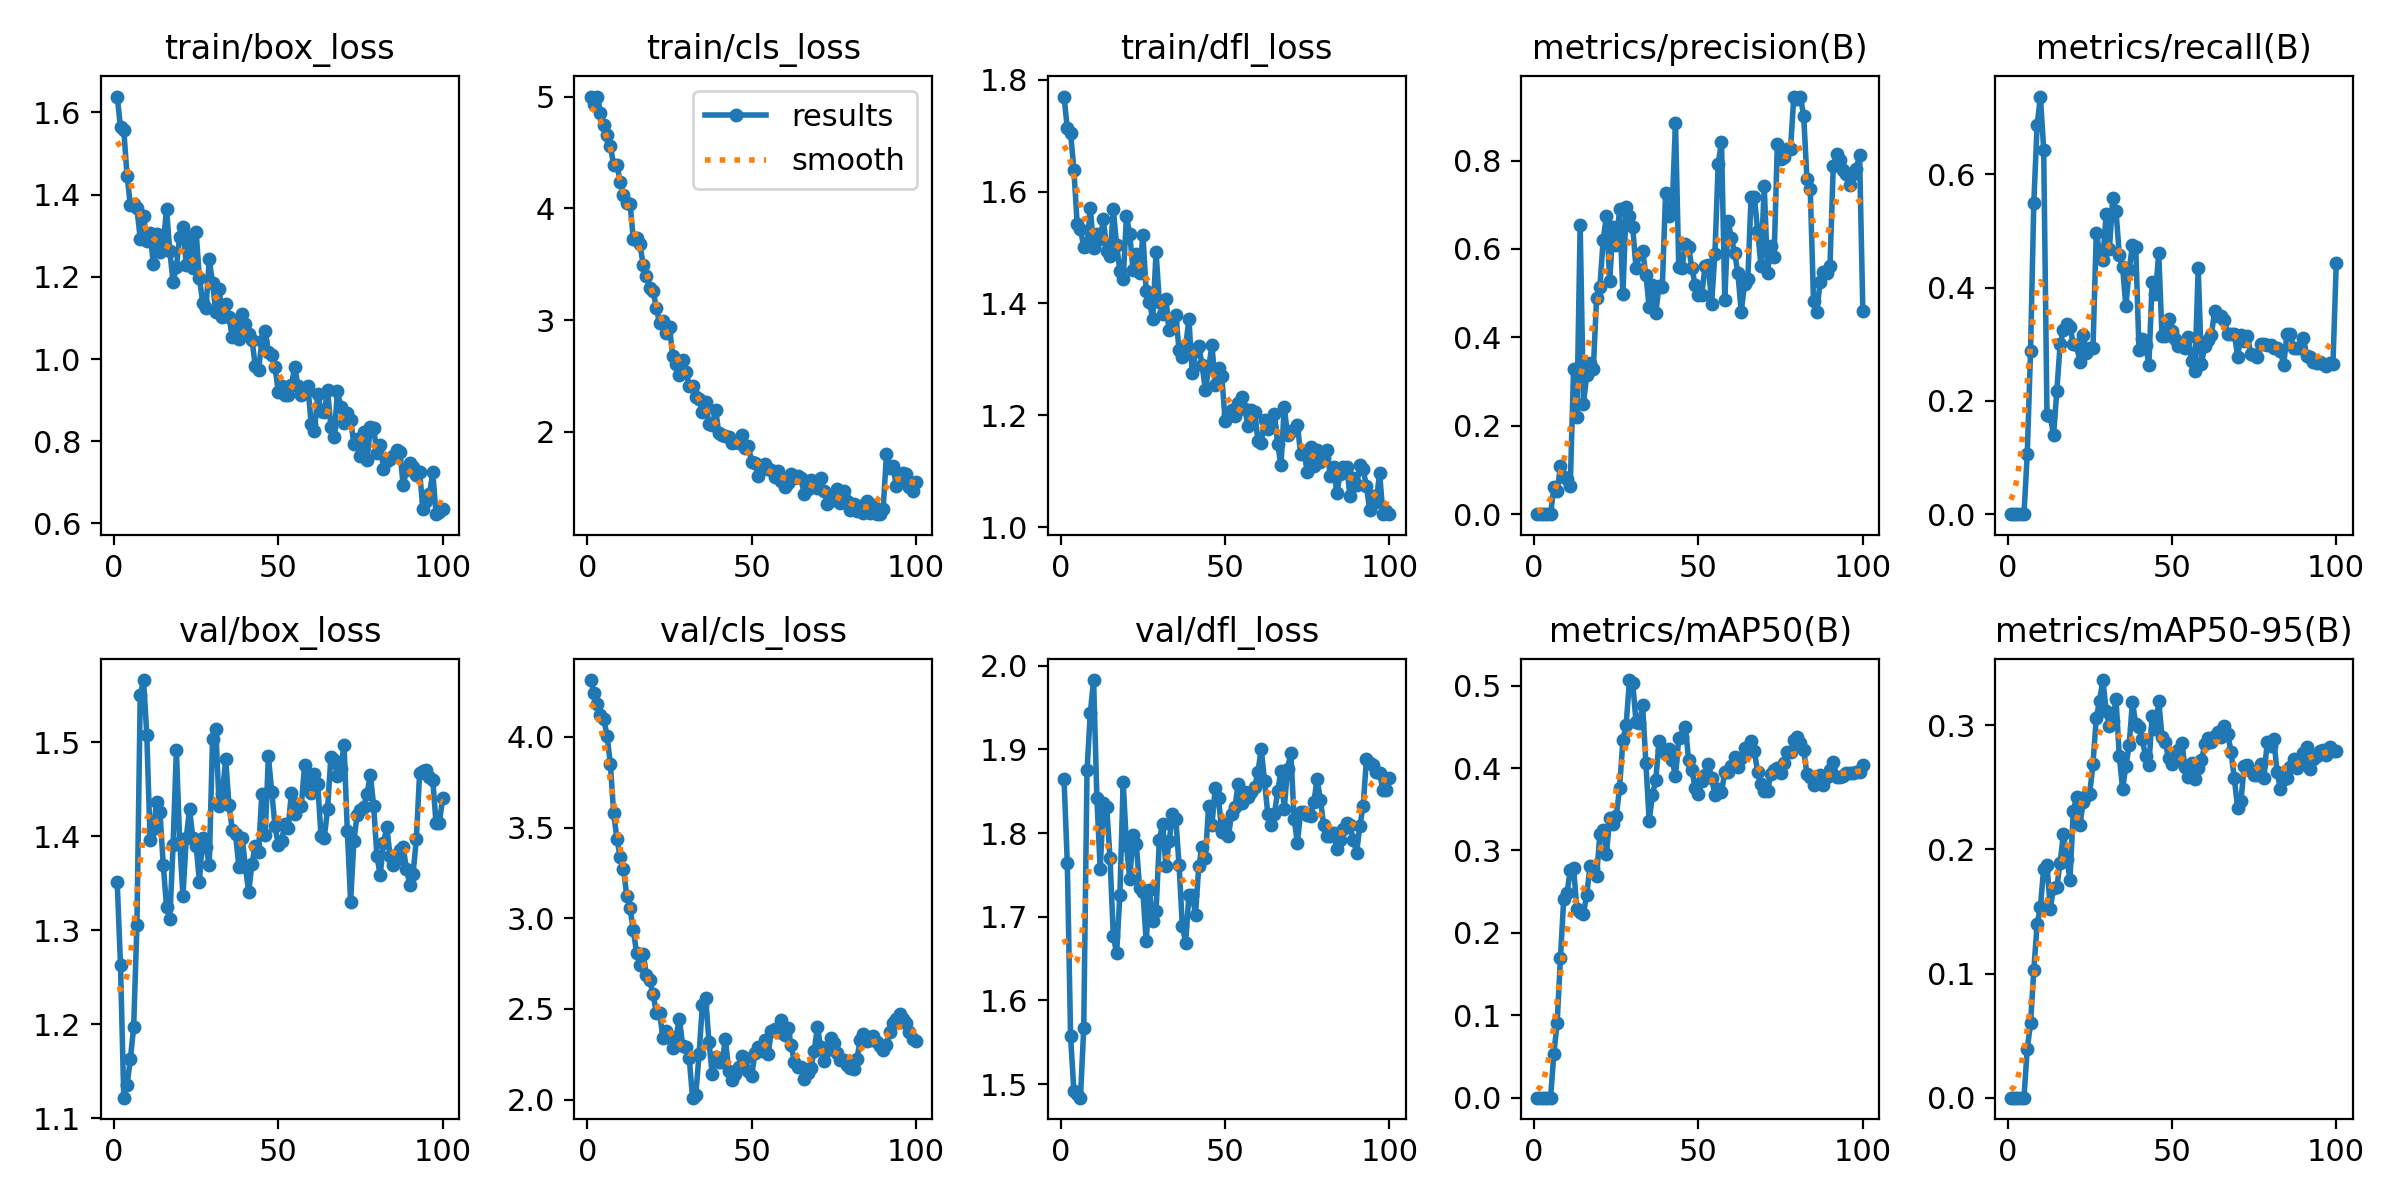

In [12]:
from PIL import Image

#display(open('/kaggle/working/runs/detect/train/confusion_matrix.png')) # Confusion Matrix

#display(open('/kaggle/working/runs/detect/train/BoxPR_curve.png')) # Precision | Recall

display(Image.open('/kaggle/working/runs/detect/train_proj/results.png'))

## Validation

In [13]:
val_results = model.val(name='val_results')

Ultralytics 8.3.221 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,589,172 parameters, 0 gradients, 6.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2915.8±750.6 MB/s, size: 198.6 KB)
val: Scanning /kaggle/working/datasets/yolov7_data/labels/val.cache... 25 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 25/25 59.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s1.7s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         25         27      0.566      0.436      0.511      0.338
Imagem de baixa resolução para classificação          2          2          0          0      0.144     0.0156
                 LPP 1          1          1       0.65          1      0.995      0.597
                 LPP 2          4          5      0.249        0.6      0.407      0.157
                 LPP 3          5          5      0.426      0.595      0.539      0.429
                 LPP 4          4          4          1      0.446      0.849      0.683
                LPP NC          5          5      0.664        0.6      0.744      0.587
     Lesão cicatrizada          1          1          1          0      0.124     0.0871
         Não se aplica          3          4      0.538       0.25      0.284      0.145
Speed: 11.8ms preprocess, 13.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/runs/detect/val_results2


In [14]:
! ls /kaggle/working/runs/detect/val_results

BoxF1_curve.png  confusion_matrix_normalized.png  val_batch1_labels.jpg
BoxP_curve.png	 confusion_matrix.png		  val_batch1_pred.jpg
BoxPR_curve.png  val_batch0_labels.jpg
BoxR_curve.png	 val_batch0_pred.jpg


### Confusion Matrix

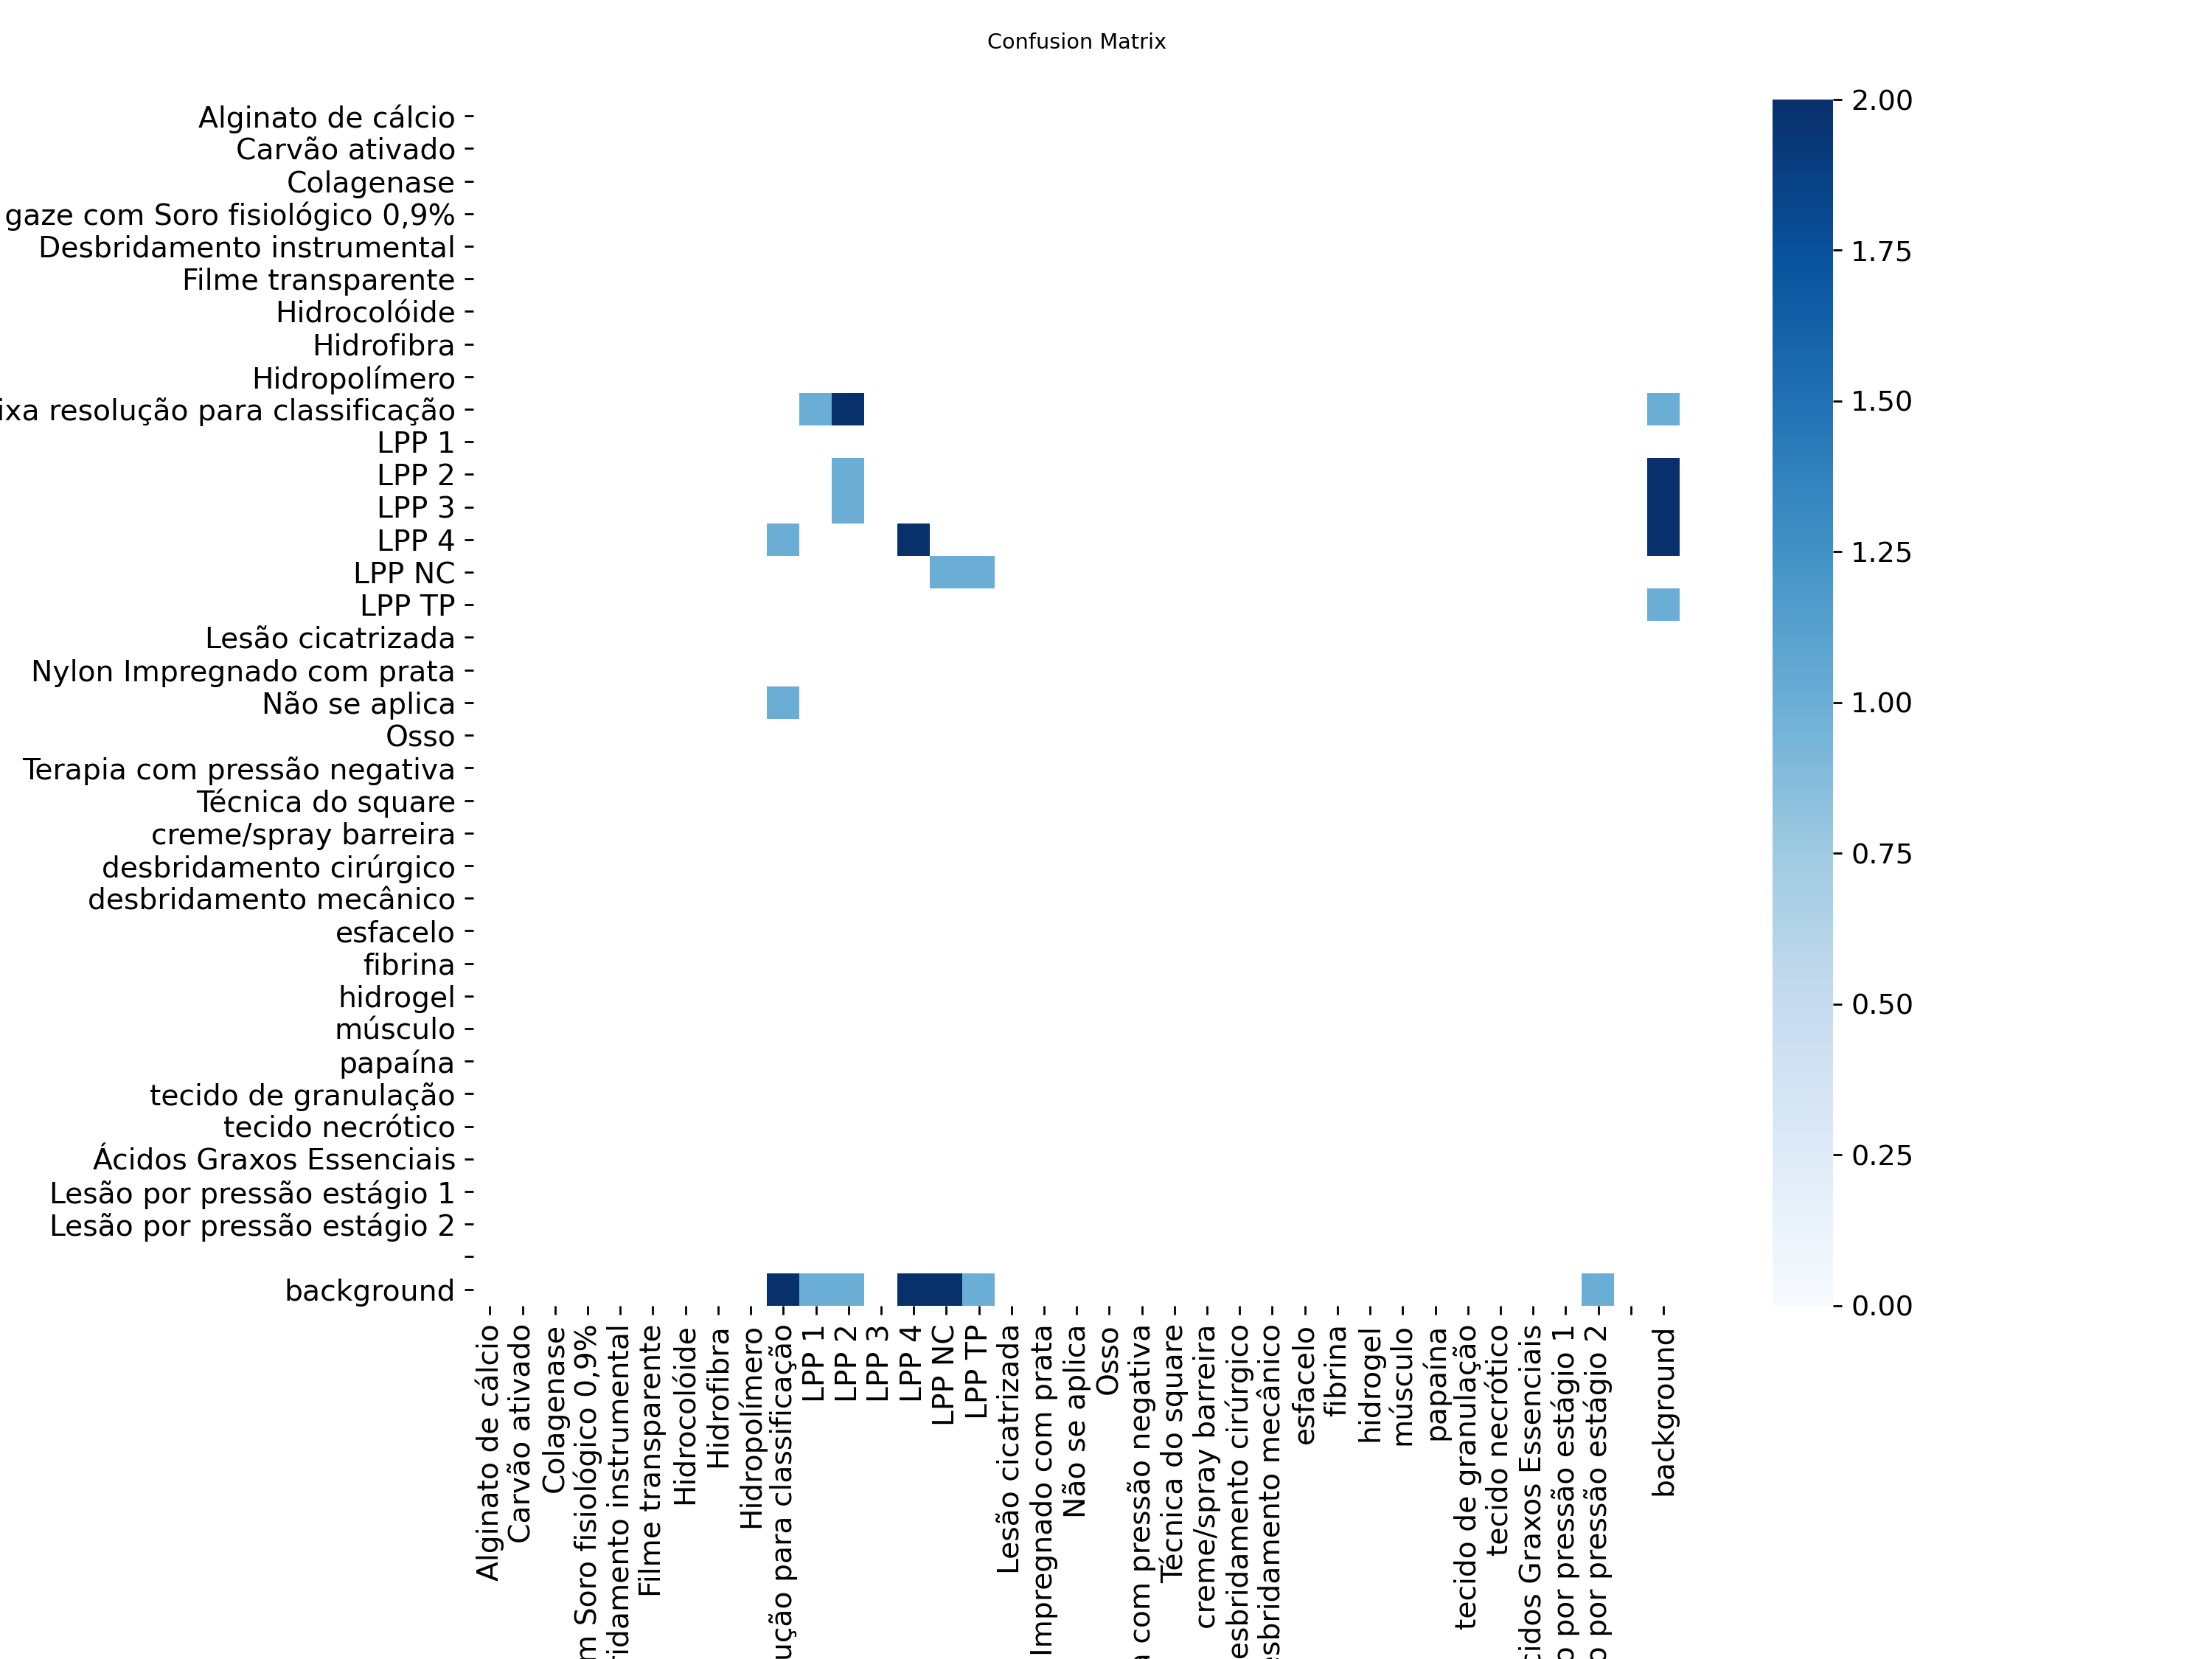

In [15]:
display(Image.open('/kaggle/working/runs/detect/val_results/confusion_matrix.png'))

## Testing Prediction

In [18]:
! ls /kaggle/working/datasets/yolov7_data/images/test

Invalid_010.png  Stage_I_025.png   Stage_II_028.png   Stage_IV_021.png
Invalid_045.png  Stage_I_028.png   Stage_II_029.png   Stage_IV_025.png
Invalid_046.png  Stage_II_007.png  Stage_II_040.png   Unstageable_003.png
Invalid_047.png  Stage_II_013.png  Stage_III_018.png  Unstageable_005.png
Stage_I_002.png  Stage_II_016.png  Stage_III_025.png  Unstageable_017.png
Stage_I_016.png  Stage_II_018.png  Stage_III_029.png
Stage_I_019.png  Stage_II_027.png  Stage_III_037.png


In [ ]:
img = Image.open(os.path.join(final_output_path, 'images', 'test', 'Stage_I_002.png'))

#display(img)
res = model.predict(img)
res[0].show()


In [20]:
# Real Labels
import builtins
with builtins.open(os.path.join(final_output_path, 'labels', 'test', 'Stage_I_002.txt'), 'r') as file:
    print(file.read())

10 0.4729433749949755 0.43512974051896136 0.8422684831678908 0.8263473053892202

